# Top Charts of 2017 on Spotify

<img src="imgs/music_charts.jpg">

## Required Libraries

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
from collections import Counter
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
%matplotlib inline
# from IPython.display import Image

## Methods to be used (Make sure to run this cell)

In [2]:
def get_text_numeric(data):
    numeric = data.drop(['id','name','artists'], axis=1)
    text = data.drop(numeric.columns, axis=1)
    return text, numeric

def plot_correlation_map( df , annot=True):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = annot, 
        annot_kws = { 'fontsize' : 12 }
    )
    
def get_top_artists(data, top=10):
    return data["artists"].value_counts()[:top]

def plot_top_artists(data, top=10):
    artists = get_top_artists(data,top=top)
    ax = sns.barplot(artists.values, artists.index,estimator=abs, color='indianred')
    plt.title("Artists ranked by number of top charts")
    ax.set(xlabel='ARTIST', ylabel='NUMBER OF CHARTS')
    
def plot_distribution(data, column_name="danceability"):
    print("Mean value for {}: {}".format(column_name.upper(),data[column_name].mean()))
    sns.distplot(data[column_name])
    plt.title("Distribution of values for variable {}".format(column_name.upper()))
    
def find(df, query, column_name):
#     q = query.lower()
    df["lower"] = df[column_name].apply(lambda x: x.lower())
    df = df[df["lower"] ==  query.lower()]
    return df

def most_common_words(data,top=20):
    terms = [song.replace("(","").replace(")","").replace("-","").split(" ") for song in list(data["name"].values)]
    terms = sum(terms, [])
#     terms.remove("-")
    c = Counter(terms)
    return c.most_common(top)

def plot_keys(data):
    key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
    data['key2'] = data['key'].map(key_mapping)
    sns.countplot(x = 'key2', data=data, order=data['key2'].value_counts().index)
    plt.title("Count of Song Keys")
    data = data.drop(["key2"],axis=1)
# plt.show()
def plot_word_cloud(data, column_name="name",num_words=80):
    terms = [song.replace("(","").replace(")","").replace("-","").split(" ") for song in list(data[column_name].values)]
    terms = sum(terms, [])
    txt = " ".join(terms)

    wordcloud = WordCloud().generate(txt)

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(background_color="white",max_words=80,max_font_size=40, relative_scaling=.4).generate(txt)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

def plot_keys(data):
    key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
    data['key2'] = data['key'].map(key_mapping)
    sns.countplot(x = 'key2', data=data, order=data['key2'].value_counts().index)
    plt.title("Count of Song Keys")
    data = data.drop(["key2"],axis=1)
# plt.show()

# Let's load the dataset from a CSV file

In [3]:
data = pd.read_csv("data/spotify.csv")

### First five rows look like this

[Column Value METADATA](https://www.kaggle.com/nadintamer/top-tracks-of-2017/data)

In [4]:
data.head(5)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


# Let's split the data into Numeric and Text data

In [5]:
text, numeric = get_text_numeric(data)

### Text data (first five rows)

In [6]:
text.head(5)

,id,name,artists
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled


### Numeric data (first five rows)

In [7]:
numeric.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


### How many songs do we have?

In [8]:
unique_song_names = text["name"].unique()
print("The number of songs in our dataset is:",len(unique_song_names))

The number of songs in our dataset is: 100


### How many artists do we have?

In [9]:
unique_artist_names = text["artists"].unique()
print("Number of artists is:", len(unique_artist_names))

Number of artists is: 78


# Is your favourite artist in the list?

In [10]:
find(text, "Bruno Mars", "artists")

,id,name,artists,lower
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,bruno mars
59,6b8Be6ljOzmkOmFslEb23,24K Magic,Bruno Mars,bruno mars


# Is your favourite song in the list?

In [11]:
find(text, "Havana", "name")

,id,name,artists,lower
49,0ofbQMrRDsUaVKq2mGLEA,Havana,Camila Cabello,havana


# What are the most common words in song names?

In [12]:
most_common_words(text,top=10)

[('feat.', 12),
 ('Me', 10),
 ('You', 7),
 ('', 7),
 ('Like', 4),
 ('the', 4),
 ('with', 4),
 ('I', 4),
 ('&', 4),
 ('of', 3)]

# Let's make a word cloud

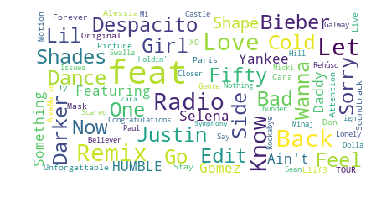

In [13]:
plot_word_cloud(data, column_name="name",num_words=80)

# Let's get the top artists!

In [14]:
get_top_artists(text, top=20)

The Chainsmokers    4
Ed Sheeran          4
Martin Garrix       3
Drake               3
Bruno Mars          2
Luis Fonsi          2
Clean Bandit        2
The Weeknd          2
Khalid              2
Post Malone         2
Calvin Harris       2
Kendrick Lamar      2
DJ Khaled           2
Imagine Dragons     2
ZAYN                2
Maroon 5            2
Halsey              1
Miley Cyrus         1
The Vamps           1
David Guetta        1
Name: artists, dtype: int64

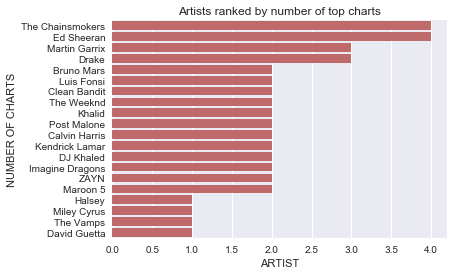

In [15]:
plot_top_artists(text, top=20)

# Which keys are most popular?

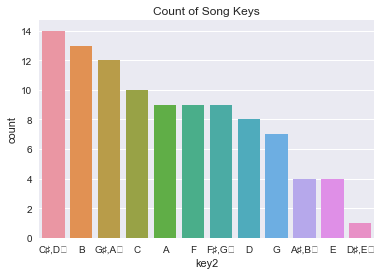

In [16]:
plot_keys(numeric)

# How suitable for dancing are these songs?

Mean value for DANCEABILITY: 0.6968199999999999


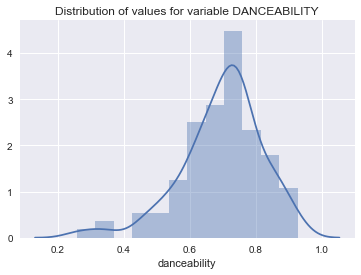

In [17]:
plot_distribution(numeric, column_name="danceability")

# How loud are these songs?

Mean value for LOUDNESS: -5.652649999999998


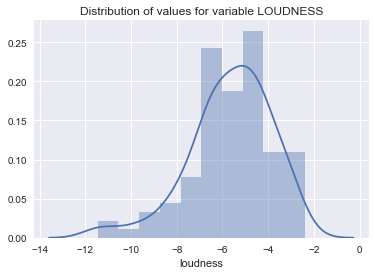

In [18]:
plot_distribution(numeric, column_name="loudness")

# How long are the songs?

Mean value for DURATION_MS: 218387.28


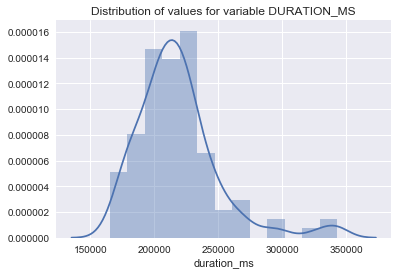

In [19]:
plot_distribution(numeric, column_name="duration_ms")

# How long accoustic the songs?

Mean value for ACOUSTICNESS: 0.16630649000000006


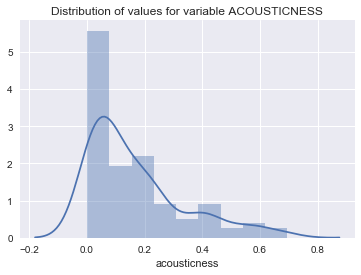

In [20]:
plot_distribution(numeric, column_name="acousticness")

# Are numerical variables correlated?

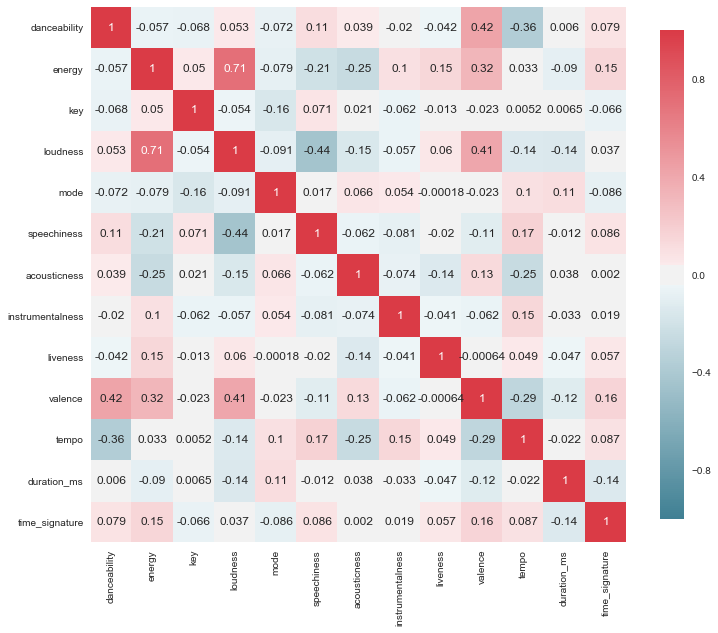

In [21]:
plot_correlation_map(numeric)